In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score , recall_score , roc_auc_score

bank = pd.read_csv("/Users/utkarshbharadwaj/Downloads/Projects/Campaign/bank-additional/bank-additional-full.csv", delimiter=';')

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
bank.isnull().sum(axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
def split_num_obj(df):
    df_num = df.select_dtypes(exclude=object)
    df_obj = df.select_dtypes(include=object)
    return df_num,df_obj

In [8]:
def convert_to_cat(df):
    for col in df.columns:
        if col != 'education':
            df.loc[:,col] = df[col].astype('category', ordered=False)
    return df

In [9]:
def cnv_to_num(df):
    for col in df.columns:
        df.loc[:,col] = df[col].cat.codes
    return df

In [10]:
bank_num, bank_obj = split_num_obj(bank)
bank_cat = convert_to_cat(bank_obj)
bank_cat["education"] = bank_cat["education"].astype("category",
                categories=["unknown", "primary", "secondary","tertiary"], 
                ordered=True)
bank_cat = cnv_to_num(bank_cat)
bank[bank_cat.columns] = bank_cat

/Users/utkarshbharadwaj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
/Users/utkarshbharadwaj/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/utkarshbharadwaj/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [11]:
bank[bank_cat.columns] = bank_cat

In [12]:
bank.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object

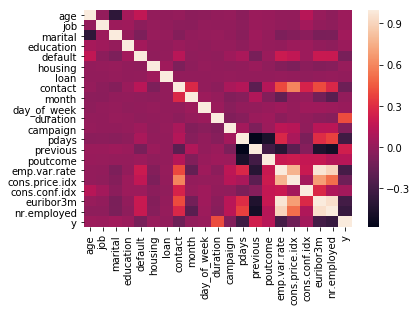

In [13]:
import seaborn as sns
sns.heatmap(bank.corr())

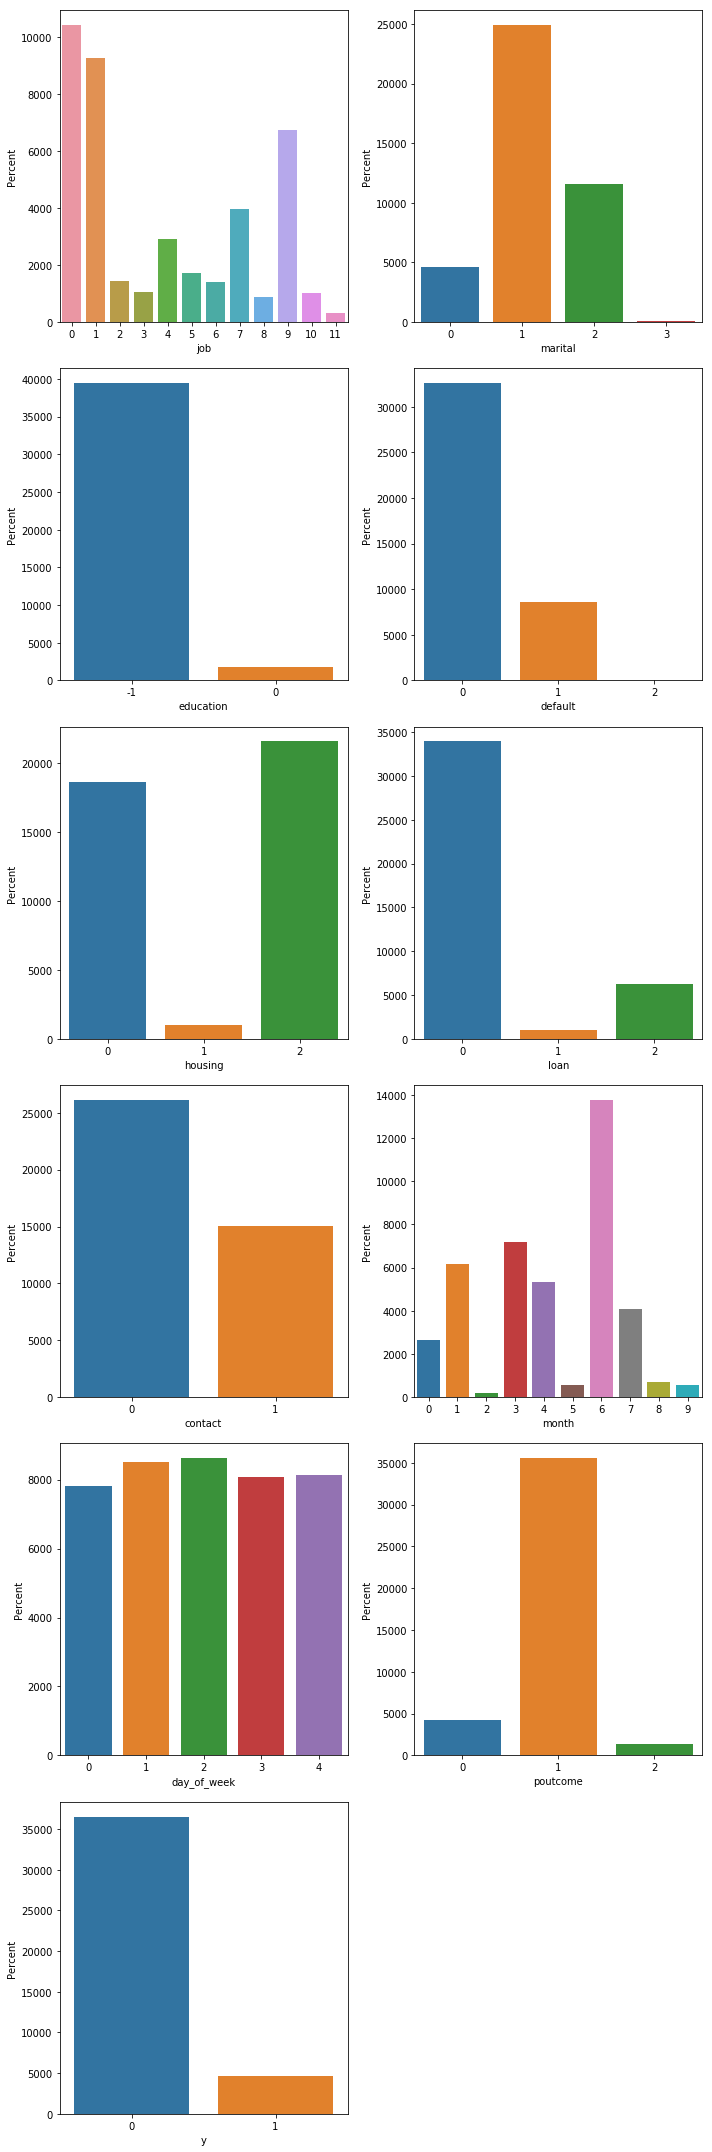

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,30))

for i, col in enumerate(bank_cat.columns):  

    plt.subplot(6, 2, i+1)  
    sns.countplot(x=col,  data=bank)\
         .set(xlabel=col, ylabel='Percent')    
    plt.tight_layout()

plt.show()

plt.clf()
plt.close('all')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(bank.drop('y',axis=1), 
                                                    bank.y, random_state=42, test_size=0.25)

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297 entries, 32884 to 1937
Data columns (total 20 columns):
age               10297 non-null int64
job               10297 non-null int8
marital           10297 non-null int8
education         10297 non-null int8
default           10297 non-null int8
housing           10297 non-null int8
loan              10297 non-null int8
contact           10297 non-null int8
month             10297 non-null int8
day_of_week       10297 non-null int8
duration          10297 non-null int64
campaign          10297 non-null int64
pdays             10297 non-null int64
previous          10297 non-null int64
poutcome          10297 non-null int8
emp.var.rate      10297 non-null float64
cons.price.idx    10297 non-null float64
cons.conf.idx     10297 non-null float64
euribor3m         10297 non-null float64
nr.employed       10297 non-null float64
dtypes: float64(5), int64(5), int8(10)
memory usage: 985.5 KB


In [17]:
!pip install imblearn

In [18]:
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.ensemble import RandomForestClassifier

rus = RandomUnderSampler(return_indices= True)
X_res, y_res, idx_res = rus.fit_sample(X_train, y_train)

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_res, y_res)

model.score(X_res, y_res)
y_pred = model.predict(X_test)

print(f'Accuracy Score for Test: {accuracy_score(y_test,y_pred)}')
print(f'Recall for test: {recall_score(y_test, y_pred)}')

print(f'Confusion matrix: \n{confusion_matrix(y_test,y_pred)}')
print(f'Area under the curve: {roc_auc_score(y_test, y_pred)}')

/Users/utkarshbharadwaj/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score for Test: 0.8605419054093425
Recall for test: 0.9019947961838681
Confusion matrix: 
[[7821 1323]
 [ 113 1040]]
Area under the curve: 0.8786548784068948


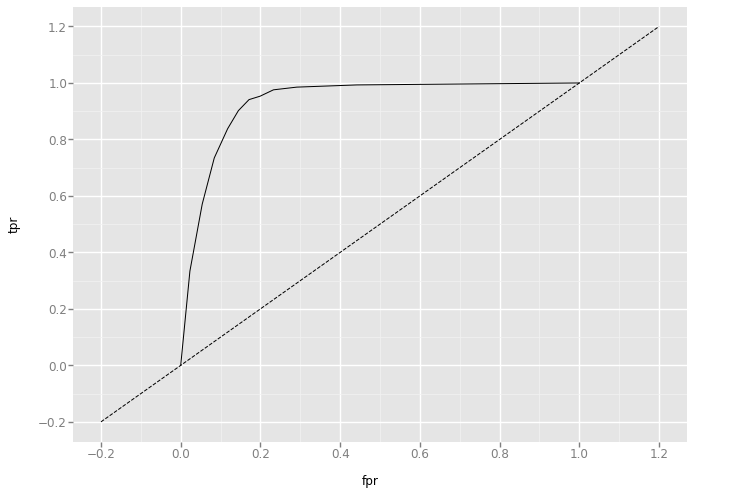

<ggplot: (7544612956)>

In [21]:
from sklearn import metrics
import pandas as pd
from ggplot import *


preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
geom_line() +\
geom_abline(linetype='dashed')